<a href="https://colab.research.google.com/github/anabossler/Ease-of-Doing-Business/blob/master/clusterclase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
%matplotlib inline

# general
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# modelling
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing 
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

#Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot preference
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

print('Libraries imported.')

Libraries imported.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datatest - Sheet1 (1).csv to datatest - Sheet1 (1).csv


Lectura de datos

In [ ]:
country=pd.read_csv('datatest - Sheet1 (1).csv',index_col=0)

In [ ]:
country.head()

,valor,Balanza comercial,Cantidad exportadas,Precio por tonelada,Crecimiento valor 5 años,Crecimiento cantidades 5 añis,Crecimiento último año valor,Ranking importaciones mundiales,Porcentaje importaciones mundiales,crecimiento importaciones mundial,Distancia de España,Concentración de los 50 exportadores,Tarifa promedio
Importaciones,,,,,,,,,,,,,
Afghanistan,59,359,241,1490,-1,-1,-23,168,0.00,-3,5348,0.24,10.0
Albania,64,64,37,1730,15,8,176,62,0.20,21,468,0.79,10.0
Algeria,652,638,175,3726,-26,-40,209,109,0.05,-15,5018,0.21,25.3
Angola,776,776,477,1627,-1,-3,-32,88,0.08,-14,7374,0.28,50.0
Argentina,177,-1170,82,2159,8,16,-21,54,0.20,5,9658,0.19,14.0


In [ ]:
print(f'The number of rows are {country.shape[0]} \and the number of columns are {country.shape[1]}')

The number of rows are 136 nd the number of columns are 13


In [ ]:
print(country.dtypes)

valor                                     int64
Balanza comercial                         int64
Cantidad exportadas                       int64
Precio por tonelada                       int64
Crecimiento valor 5 años                  int64
Crecimiento cantidades 5 añis             int64
Crecimiento último año valor              int64
Ranking importaciones mundiales           int64
Porcentaje importaciones mundiales      float64
crecimiento importaciones mundial         int64
Distancia de España                       int64
Concentración de los 50 exportadores    float64
Tarifa promedio                         float64
dtype: object


In [ ]:
country.describe()

,valor,Balanza comercial,Cantidad exportadas,Precio por tonelada,Crecimiento valor 5 años,Crecimiento cantidades 5 añis,Crecimiento último año valor,Ranking importaciones mundiales,Porcentaje importaciones mundiales,crecimiento importaciones mundial,Distancia de España,Concentración de los 50 exportadores,Tarifa promedio
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,8076.860294,5283.250000,5373.573529,1690.448529,8.198529,9.492647,44.286765,77.919118,0.694926,4.823529,4020.808824,0.292647,11.105147
std,25575.715379,24841.826439,16712.314844,431.029204,18.457085,22.653917,329.741266,50.388572,1.742635,9.717401,2499.528253,0.185705,12.173233
min,2.000000,-108916.000000,1.000000,963.000000,-28.000000,-40.000000,-85.000000,1.000000,0.000000,-34.000000,317.000000,0.090000,0.000000
25%,144.500000,89.500000,99.500000,1407.500000,-1.000000,-1.000000,-15.250000,35.750000,0.040000,-1.000000,1955.750000,0.157500,0.000000
50%,1147.000000,662.000000,724.500000,1638.000000,5.000000,6.500000,0.500000,71.500000,0.100000,5.000000,3867.500000,0.230000,7.850000
75%,3090.500000,2854.750000,1889.750000,1870.500000,13.250000,16.000000,24.250000,115.500000,0.500000,10.250000,5689.500000,0.360000,20.000000
max,202117.000000,201598.000000,114457.000000,3726.000000,122.000000,145.000000,3740.000000,185.000000,13.400000,40.000000,12060.000000,0.890000,59.100000


In [ ]:
country.cov()

,valor,Balanza comercial,Cantidad exportadas,Precio por tonelada,Crecimiento valor 5 años,Crecimiento cantidades 5 añis,Crecimiento último año valor,Ranking importaciones mundiales,Porcentaje importaciones mundiales,crecimiento importaciones mundial,Distancia de España,Concentración de los 50 exportadores,Tarifa promedio
valor,6.541172e+08,5.456913e+08,4.191438e+08,-1.083678e+06,-40394.438725,-40726.426961,-332353.737418,-510444.196569,38174.429138,2447.915904,-3.918296e+06,-889.959850,-61843.034831
Balanza comercial,5.456913e+08,6.171163e+08,3.308171e+08,-6.057930e+05,-56422.124074,-45100.435185,-508515.064815,-421944.875926,33020.750167,-2846.392593,-3.595542e+06,-963.480370,-36442.845741
Cantidad exportadas,4.191438e+08,3.308171e+08,2.793015e+08,-1.011516e+06,-25389.003595,-25703.010566,-220565.158279,-337858.827342,23670.403820,2236.709368,-4.010619e+06,-560.992270,-43099.328159
Precio por tonelada,-1.083678e+06,-6.057930e+05,-1.011516e+06,1.857862e+05,-1545.045261,-2875.118900,-4660.596242,2268.658769,-19.957856,-1083.653595,2.588745e+05,4.341322,833.450267
Crecimiento valor 5 años,-4.039444e+04,-5.642212e+04,-2.538900e+04,-1.545045e+03,340.663998,384.427397,335.083388,111.912473,-3.427874,53.753813,-7.657173e+02,0.447174,-17.720289
Crecimiento cantidades 5 añis,-4.072643e+04,-4.510044e+04,-2.570301e+04,-2.875119e+03,384.427397,513.199946,970.931754,99.143845,-3.083926,61.872767,-2.415320e+03,0.216390,-18.518110
Crecimiento último año valor,-3.323537e+05,-5.085151e+05,-2.205652e+05,-4.660596e+03,335.083388,970.931754,108729.302342,2692.660403,-29.309423,-24.800871,2.269341e+04,0.843383,236.423698
Ranking importaciones mundiales,-5.104442e+05,-4.219449e+05,-3.378588e+05,2.268659e+03,111.912473,99.143845,2692.660403,2539.008224,-43.254265,-127.762527,3.842913e+04,1.841105,275.907086
Porcentaje importaciones mundiales,3.817443e+04,3.302075e+04,2.367040e+04,-1.995786e+01,-3.427874,-3.083926,-29.309423,-43.254265,3.036778,0.058950,-4.928350e+02,-0.051305,-5.086796
crecimiento importaciones mundial,2.447916e+03,-2.846393e+03,2.236709e+03,-1.083654e+03,53.753813,61.872767,-24.800871,-127.762527,0.058950,94.427887,-5.187227e+03,0.183211,-31.643529


Correlaciones entre variables, relevante para DEA (tienen que tener alta correlación)

In [ ]:
country.corr()

,valor,Balanza comercial,Cantidad exportadas,Precio por tonelada,Crecimiento valor 5 años,Crecimiento cantidades 5 añis,Crecimiento último año valor,Ranking importaciones mundiales,Porcentaje importaciones mundiales,crecimiento importaciones mundial,Distancia de España,Concentración de los 50 exportadores,Tarifa promedio
valor,1.000000,0.858886,0.980615,-0.098303,-0.085572,-0.070292,-0.039409,-0.396085,0.856521,0.009850,-0.061293,-0.187378,-0.198636
Balanza comercial,0.858886,1.000000,0.796834,-0.056576,-0.123056,-0.080141,-0.062079,-0.337086,0.762776,-0.011791,-0.057906,-0.208851,-0.120510
Cantidad exportadas,0.980615,0.796834,1.000000,-0.140420,-0.082309,-0.067890,-0.040025,-0.401205,0.812760,0.013773,-0.096010,-0.180758,-0.211850
Precio por tonelada,-0.098303,-0.056576,-0.140420,1.000000,-0.194210,-0.294446,-0.032792,0.104455,-0.026571,-0.258722,0.240284,0.054237,0.158843
Crecimiento valor 5 años,-0.085572,-0.123056,-0.082309,-0.194210,1.000000,0.919407,0.055057,0.120333,-0.106575,0.299706,-0.016598,0.130464,-0.078868
Crecimiento cantidades 5 añis,-0.070292,-0.080141,-0.067890,-0.294446,0.919407,1.000000,0.129979,0.086854,-0.078119,0.281065,-0.042655,0.051436,-0.067150
Crecimiento último año valor,-0.039409,-0.062079,-0.040025,-0.032792,0.055057,0.129979,1.000000,0.162060,-0.051007,-0.007740,0.027534,0.013773,0.058900
Ranking importaciones mundiales,-0.396085,-0.337086,-0.401205,0.104455,0.120333,0.086854,0.162060,1.000000,-0.492595,-0.260928,0.305120,0.196754,0.449806
Porcentaje importaciones mundiales,0.856521,0.762776,0.812760,-0.026571,-0.106575,-0.078119,-0.051007,-0.492595,1.000000,0.003481,-0.113145,-0.158537,-0.239790
crecimiento importaciones mundial,0.009850,-0.011791,0.013773,-0.258722,0.299706,0.281065,-0.007740,-0.260928,0.003481,1.000000,-0.213564,0.101526,-0.267503


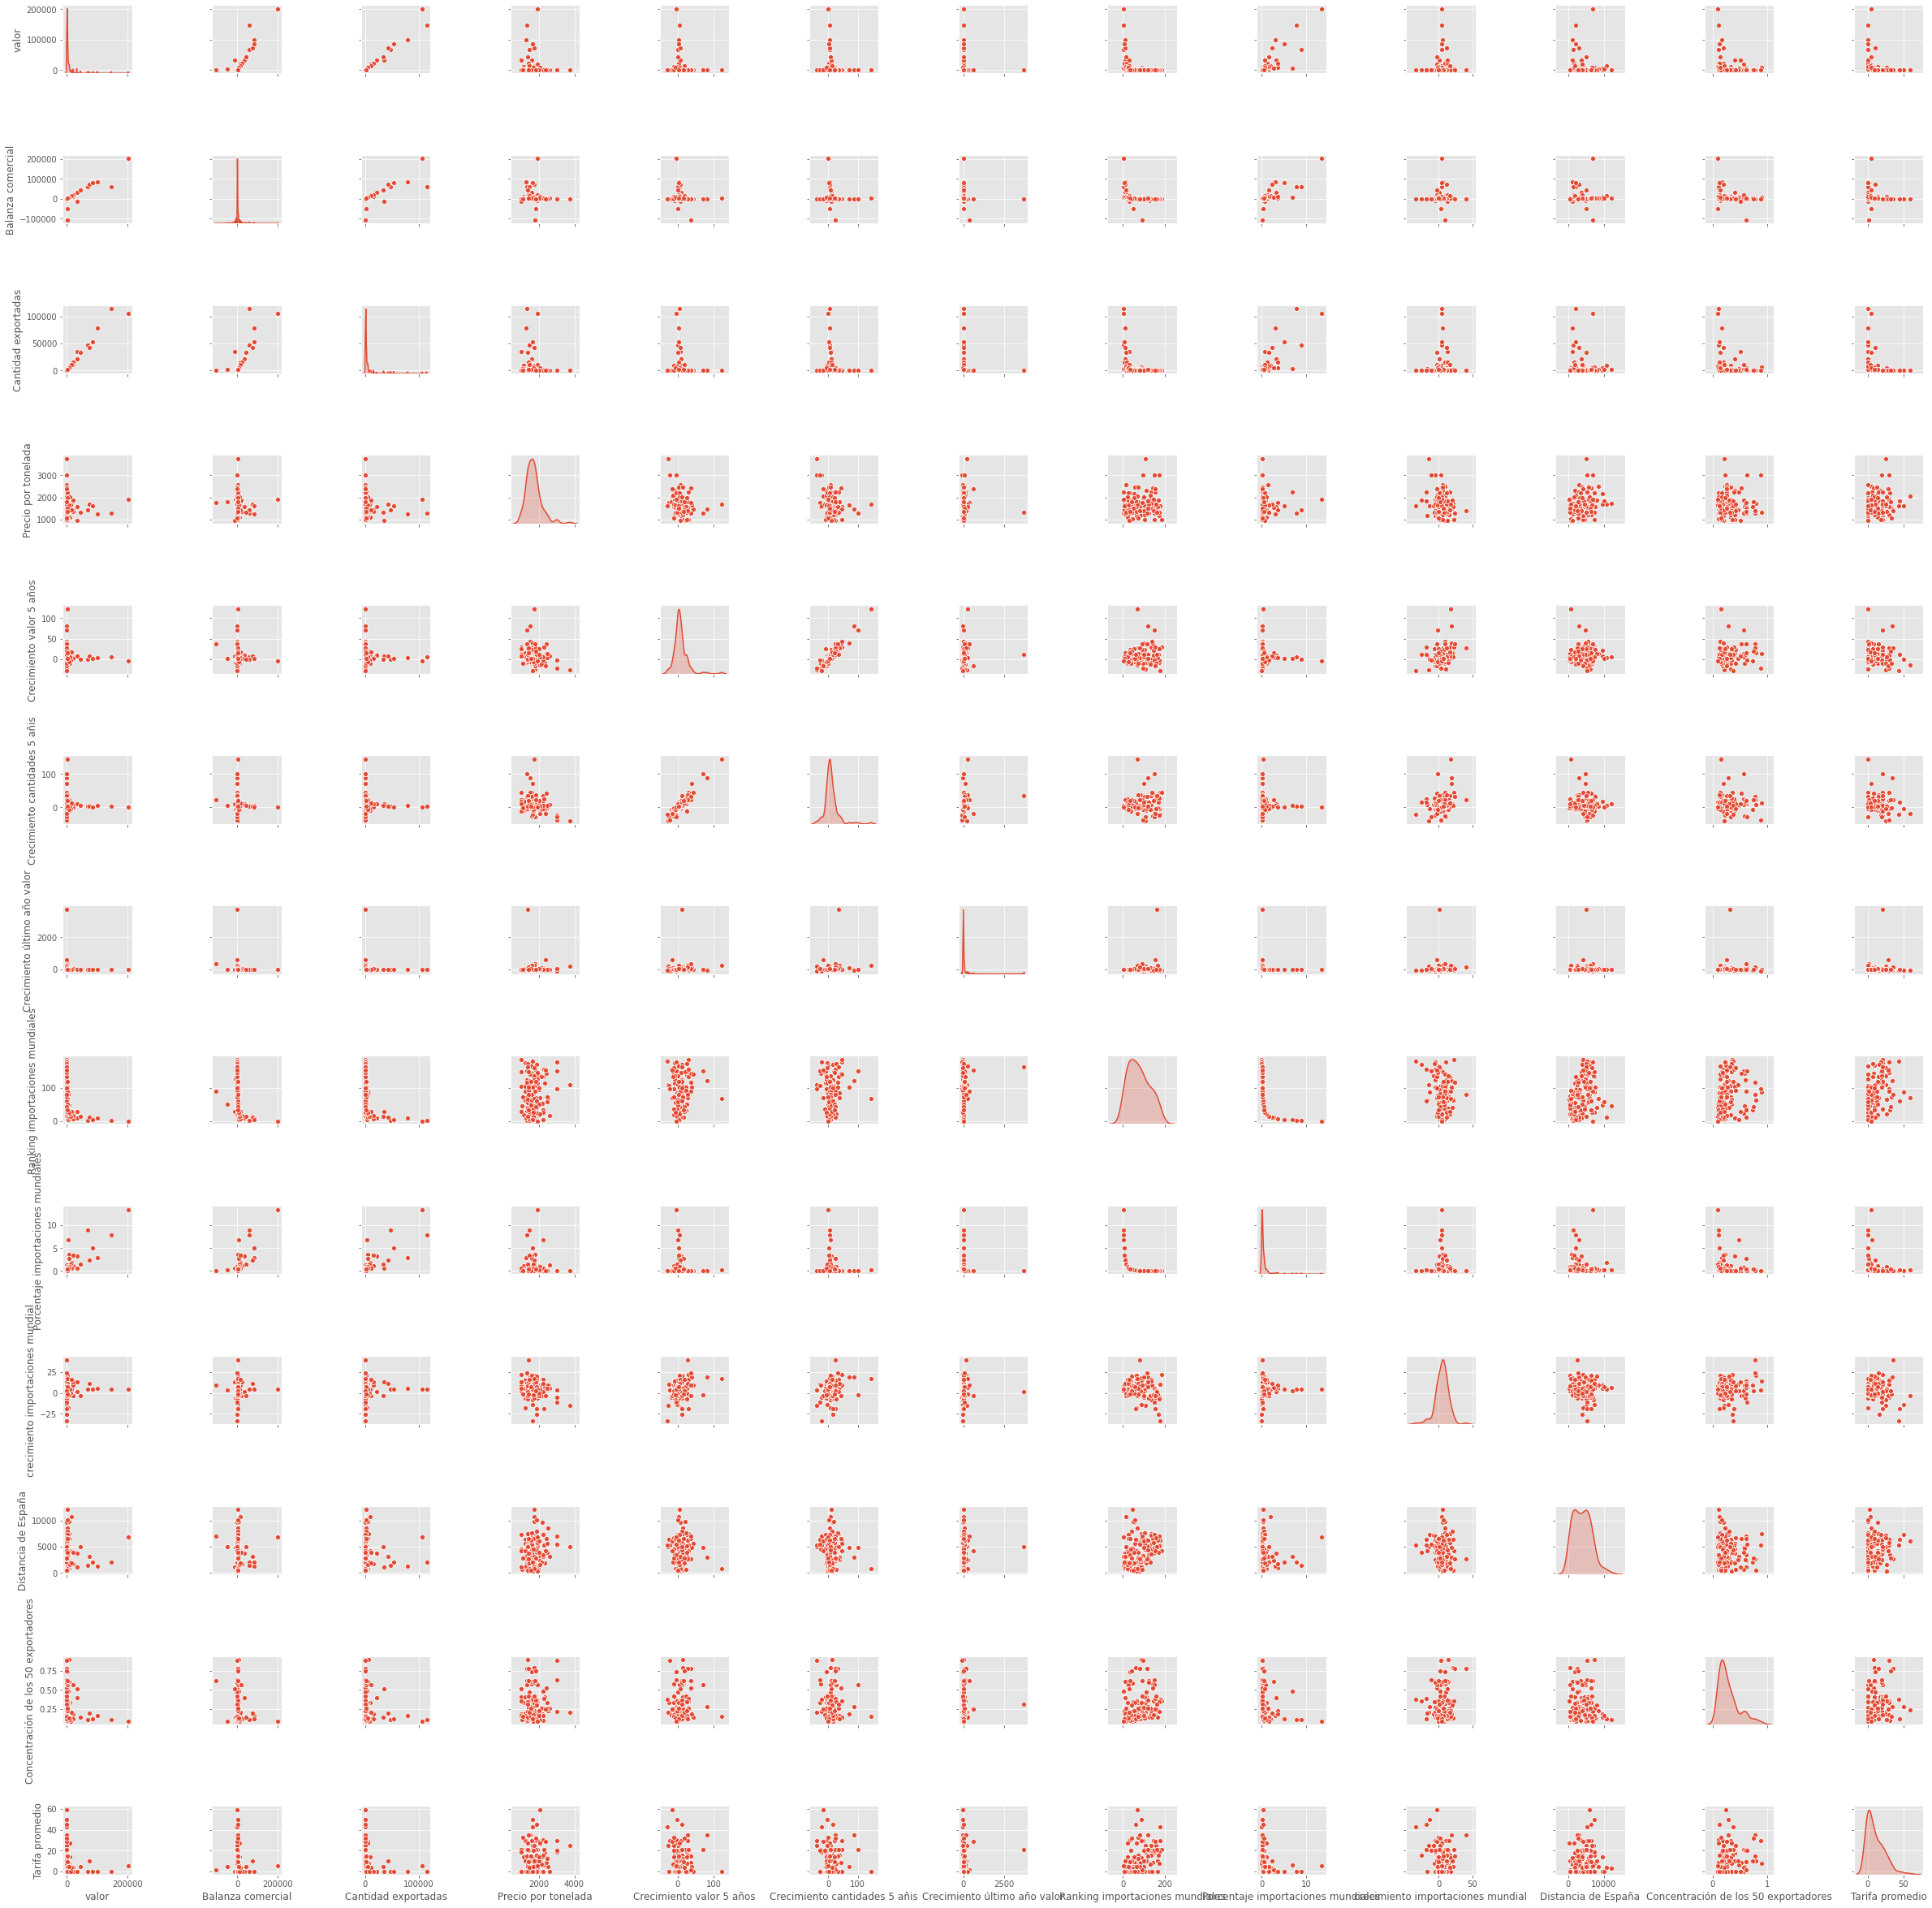

In [ ]:
sns.pairplot(country,diag_kind='kde')

Preparación de los Datos

In [ ]:
country.isna().sum()

valor                                   0
Balanza comercial                       0
Cantidad exportadas                     0
Precio por tonelada                     0
Crecimiento valor 5 años                0
Crecimiento cantidades 5 añis           0
Crecimiento último año valor            0
Ranking importaciones mundiales         0
Porcentaje importaciones mundiales      0
crecimiento importaciones mundial       0
Distancia de España                     0
Concentración de los 50 exportadores    0
Tarifa promedio                         0
dtype: int64

In [ ]:
def missing(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percent=(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)

In [ ]:
missing(country)

In [ ]:

country.isnull().sum()

valor                                   0
Balanza comercial                       0
Cantidad exportadas                     0
Precio por tonelada                     0
Crecimiento valor 5 años                0
Crecimiento cantidades 5 añis           0
Crecimiento último año valor            0
Ranking importaciones mundiales         0
Porcentaje importaciones mundiales      0
crecimiento importaciones mundial       0
Distancia de España                     0
Concentración de los 50 exportadores    0
Tarifa promedio                         0
dtype: int64

ValueError: ignored

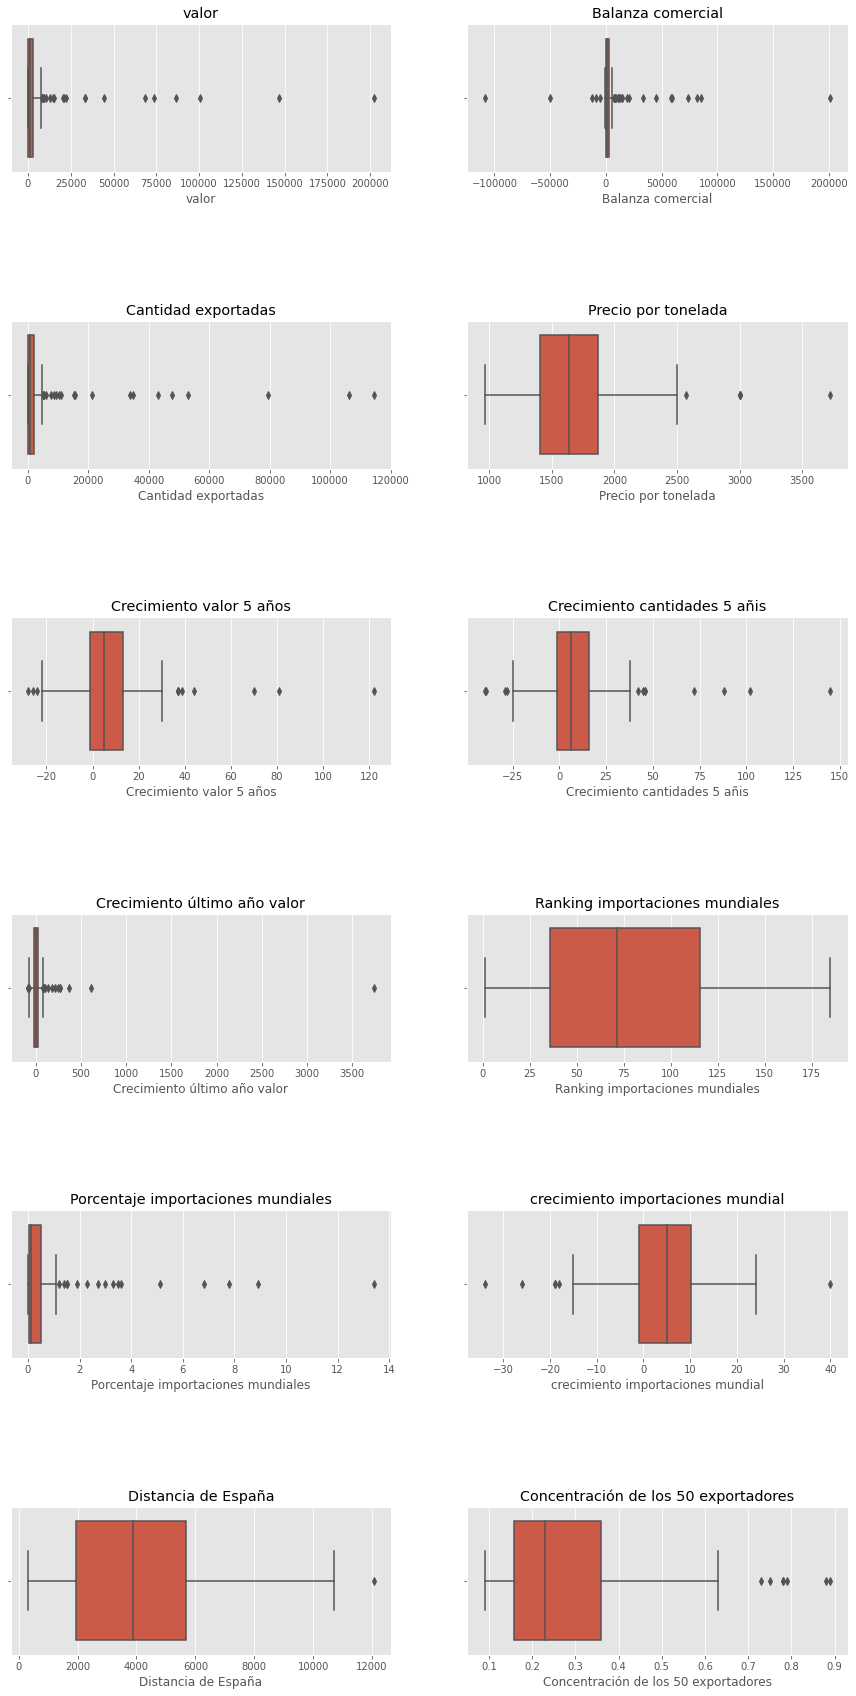

In [ ]:
features=list(country.select_dtypes(exclude=['object']))
fig=plt.subplots(figsize=(15,30))
for i, j in enumerate(features):
    plt.subplot(6, 2, i+1),
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(country[j])
    plt.title(j)

In [ ]:
cora=country.corr()

Para DEA buscamos la de mayor correlación 

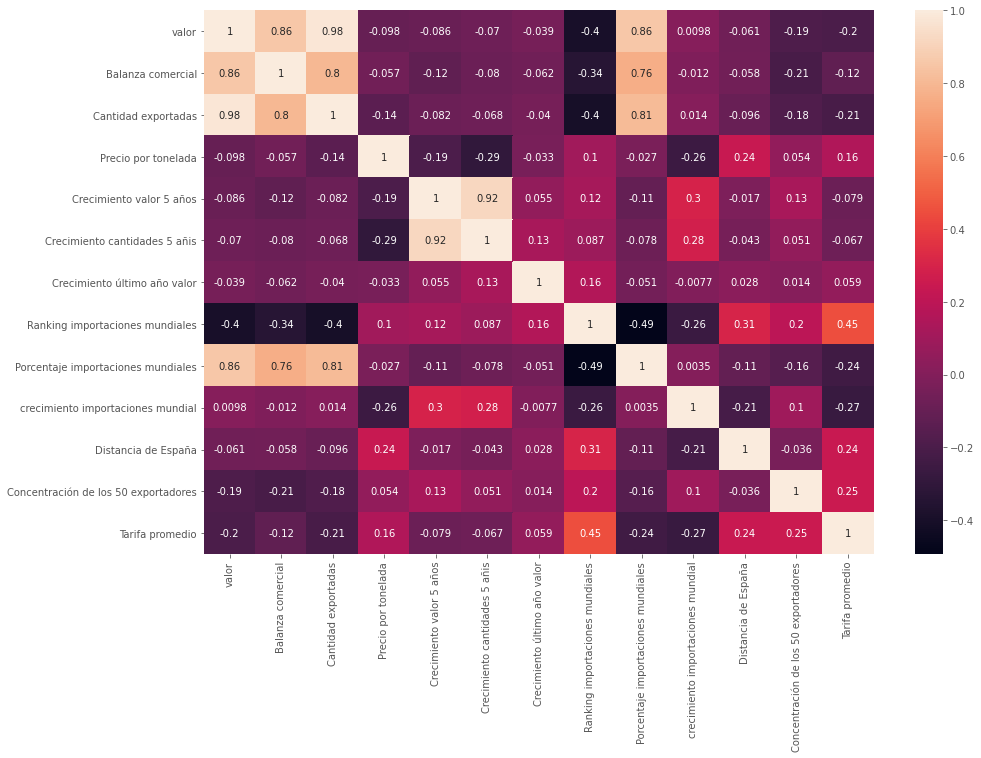

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cora,annot=True)

In [ ]:
country.head().transpose()

Importaciones,Afghanistan,Albania,Algeria,Angola,Argentina
valor,59.00,64.00,652.00,776.00,177.00
Balanza comercial,359.00,64.00,638.00,776.00,-1170.00
Cantidad exportadas,241.00,37.00,175.00,477.00,82.00
Precio por tonelada,1490.00,1730.00,3726.00,1627.00,2159.00
Crecimiento valor 5 años,-1.00,15.00,-26.00,-1.00,8.00
Crecimiento cantidades 5 añis,-1.00,8.00,-40.00,-3.00,16.00
Crecimiento último año valor,-23.00,176.00,209.00,-32.00,-21.00
Ranking importaciones mundiales,168.00,62.00,109.00,88.00,54.00
Porcentaje importaciones mundiales,0.00,0.20,0.05,0.08,0.20
crecimiento importaciones mundial,-3.00,21.00,-15.00,-14.00,5.00


In [ ]:

country.rename(columns={0:'valor',1:'balanza',2:'cantidad',3:'precio',4:'crecimientoval_5',5:'crecimiento_cant',6:'crecimientovalor_anyo',7:'ranking',8:'porcentaje_import',9: 'crecimpo_mundial',10: 'distancia',11: 'concentracion',12: 'tarifa'}, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
country_scaled = std_scale.fit_transform(country)

In [ ]:
country_scaled=pd.DataFrame(country_scaled, index=list(country.index))

In [ ]:
country_scaled=pd.DataFrame(country_scaled,columns=list(country))

In [ ]:

country_scaled.rename(columns={0:'valor',1:'balanza',2:'cantidad',3:'precio',4:'crecimientoval_5',5:'crecimiento_cant',6:'crecimientovalor_anyo',7:'ranking',8:'porcentaje_import',9: 'crecimpo_mundial',10: 'distancia',11: 'concentracion',12: 'tarifa'}, inplace=True)

In [ ]:
np.all(np.isfinite(country))

True

In [ ]:
country_scaled = country_scaled.reset_index()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

X_pca = pca.fit_transform(country_scaled)
exp_var=pca.explained_variance_ratio_

ValueError: ignored

In [ ]:
print(f'Percentage of variance explained by n_components=10 is {sum(exp_var)*100}')

NameError: ignored

In [ ]:
pca = PCA(n_components=4)

X_pca = pca.fit_transform(country_scaled)
exp_var=pca.explained_variance_ratio_

ValueError: ignored

In [ ]:
print(f'Percentage of variance explained by n_components=9 is {sum(exp_var)*100}')

Percentage of variance explained by n_components=9 is 96.31432403070865


In [ ]:
pca_comp=pd.DataFrame(X_pca)

In [ ]:

pca_comp.rename(columns={0:'pc1',1:'pc2',2:'pc3',3:'pc4',4:'pc5', 5:'pc6', 6:'pc7', 7:'pc8', 8:'pc9'}, inplace=True)

In [ ]:
pca_comp

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,9
0,-1.010132,-0.975077,0.446160,-0.568458,0.169721,-1.048093,-0.220659,-0.695738,-1.060126,-0.020369
1,-0.647698,1.349562,-0.816595,2.804297,0.690342,1.160930,-0.091966,-0.127055,-0.280276,-0.223232
2,-1.040462,-5.073818,0.368588,-0.330943,-0.406840,2.388076,1.756639,1.070103,-0.467697,0.229237
3,-1.263630,-2.351199,1.816726,0.228146,-0.101537,-1.548373,-0.080595,0.779031,1.817824,0.123650
4,-0.659809,-0.711765,0.687061,-1.133069,-1.355870,0.988172,-1.021400,0.164444,0.831811,-0.043775
...,...,...,...,...,...,...,...,...,...,...
131,-0.419946,0.326831,0.264696,-0.444823,-0.556797,0.370644,0.865321,0.348921,0.612443,-0.045523
132,-1.173336,2.412439,0.416681,3.484445,0.469585,0.616413,-1.913427,1.678908,0.037165,0.079224
133,-0.750285,-0.410628,0.337308,-0.296814,0.047850,-0.452271,-0.984259,-0.031492,-0.365409,-0.026947
134,-0.963330,0.361173,0.827591,2.524911,-0.092300,0.240847,0.676522,0.085978,1.434423,-0.196003


In [ ]:

cor=pca_comp.corr()

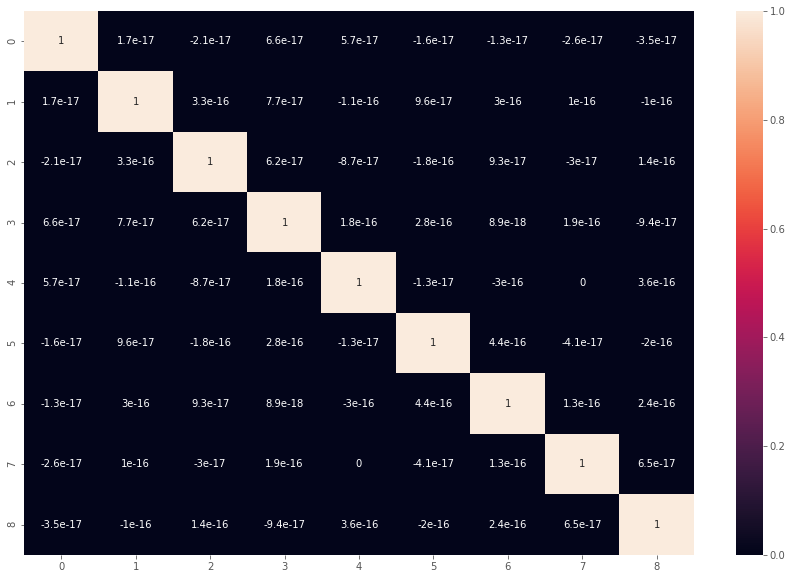

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

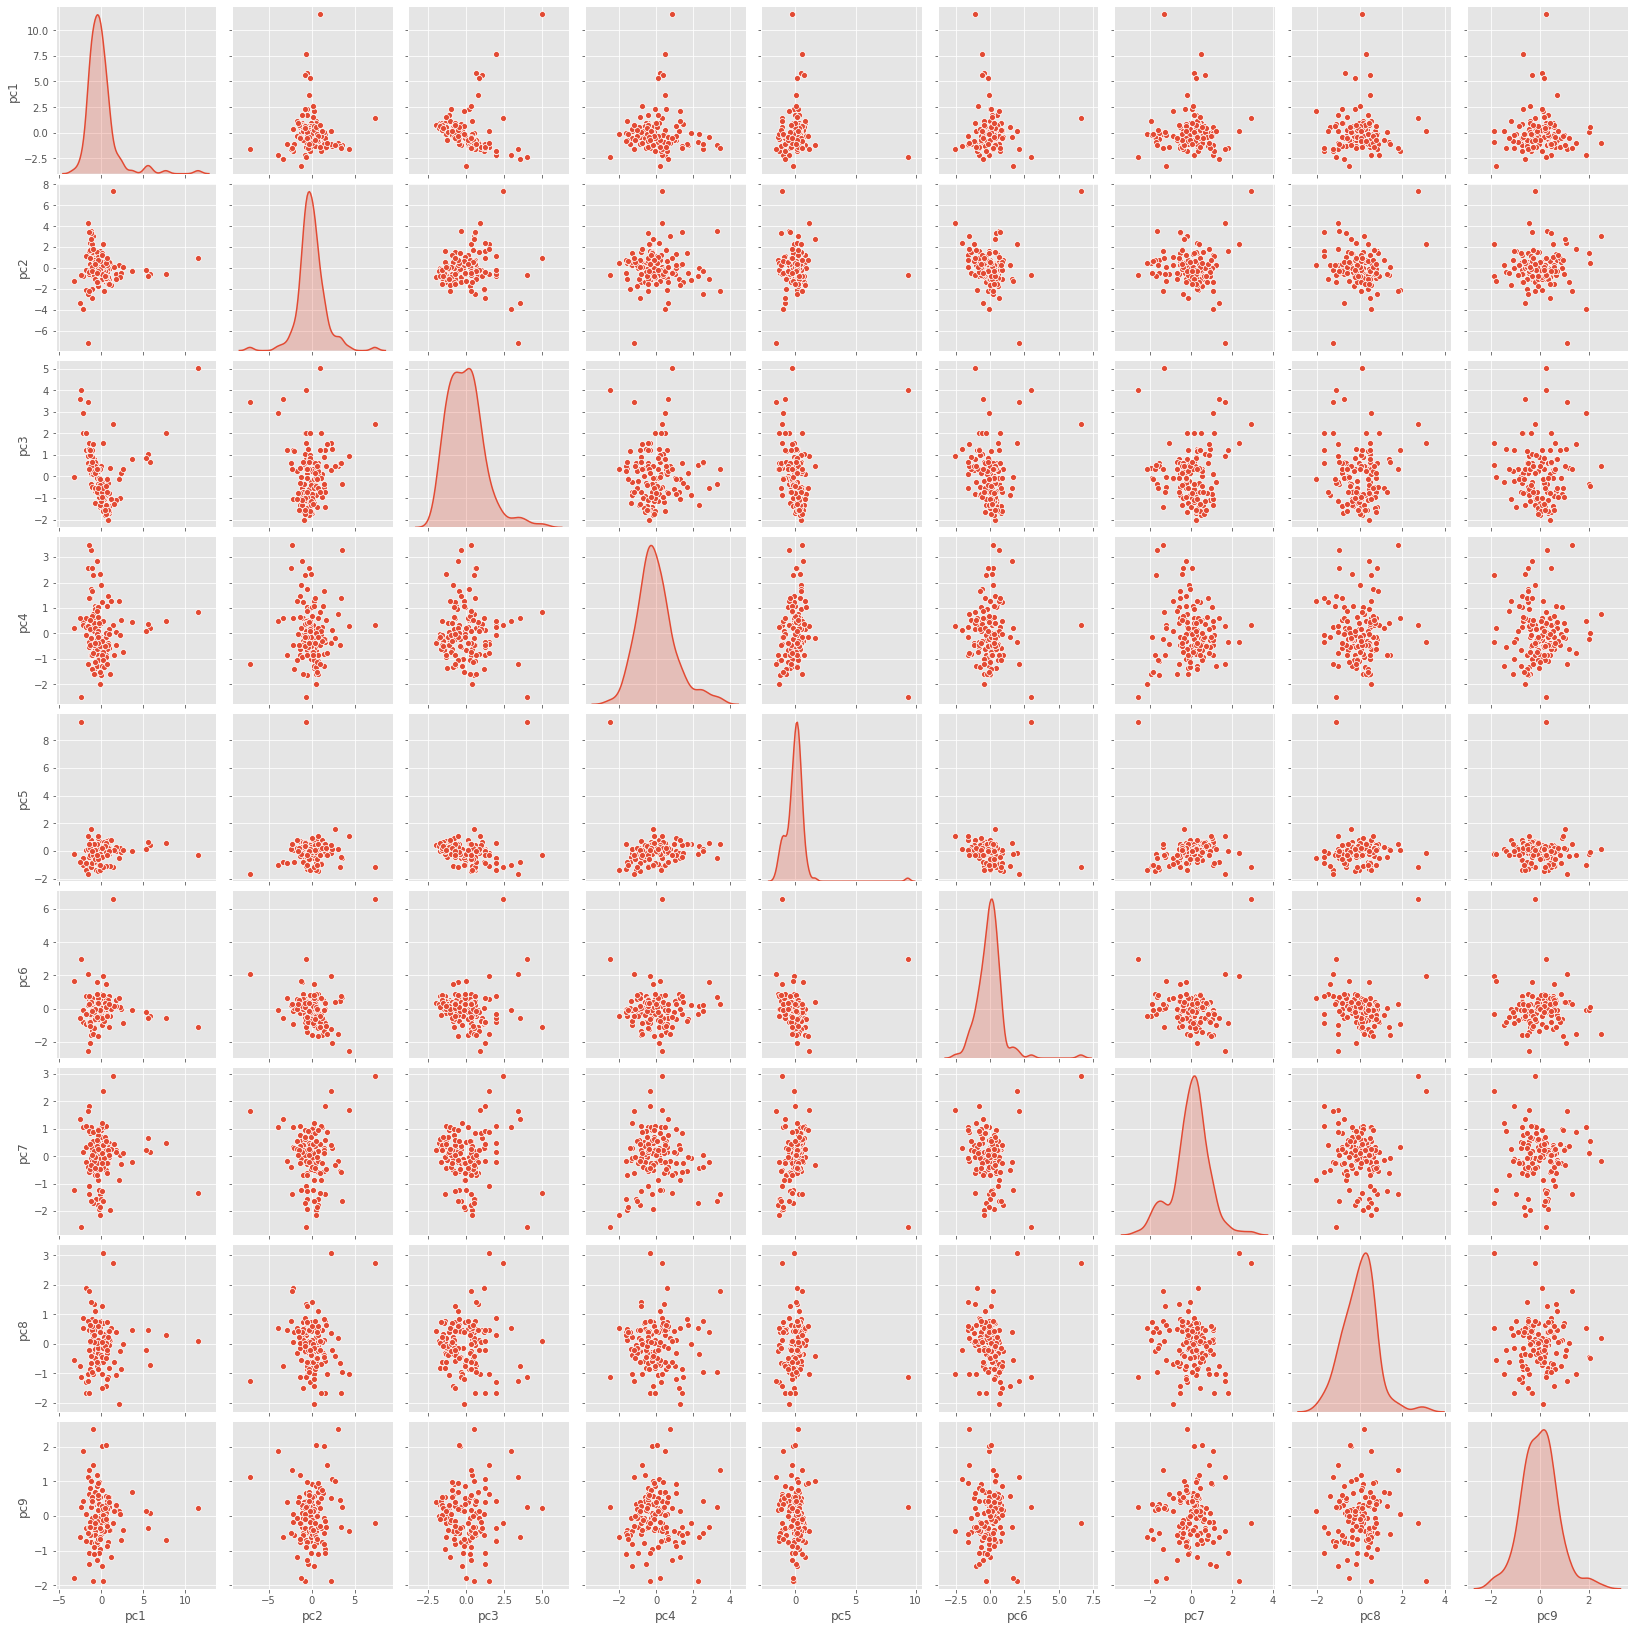

In [ ]:
sns.pairplot(pca_comp,diag_kind='kde')

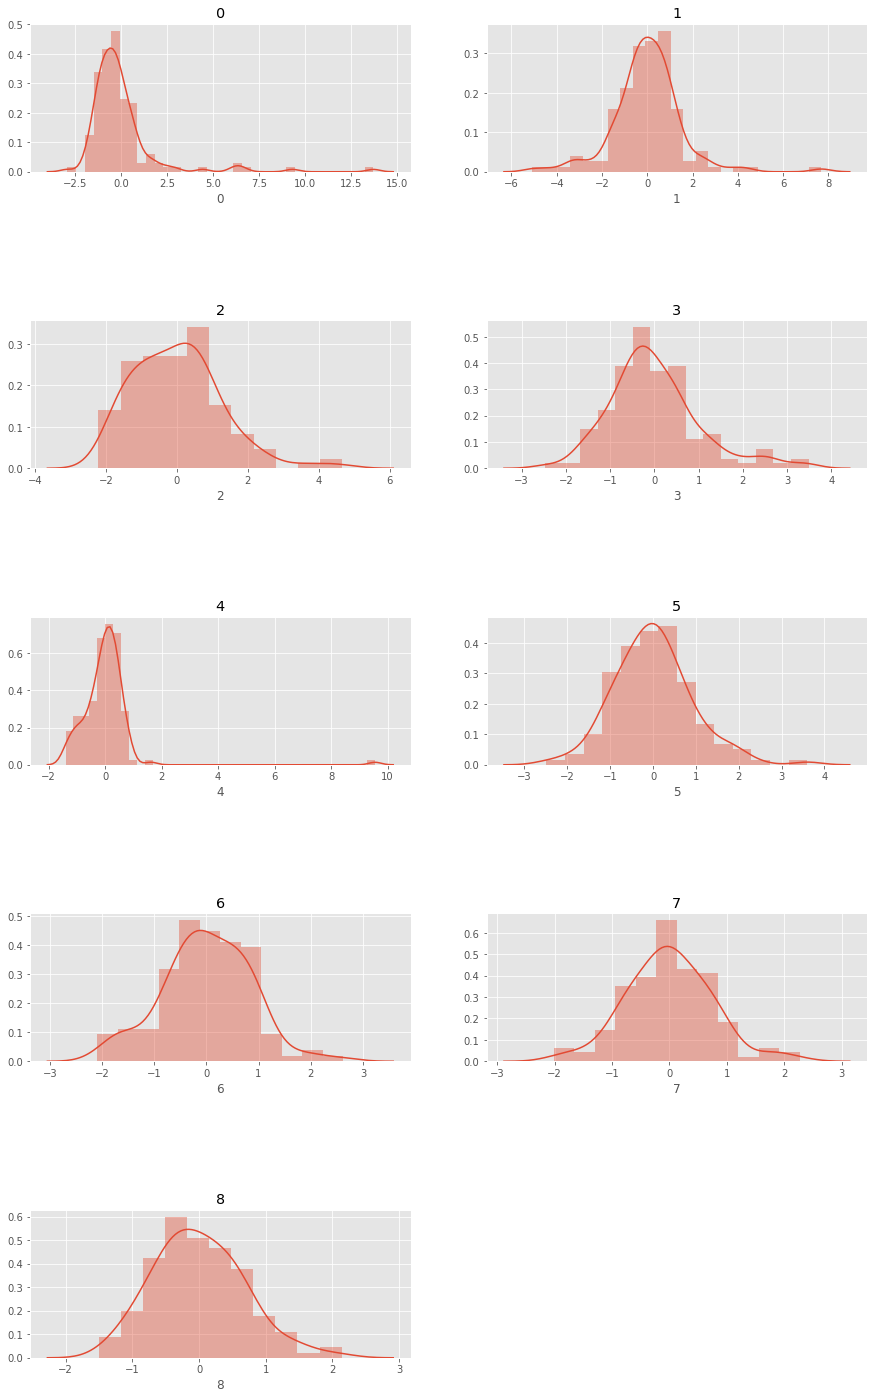

In [ ]:
features=list(pca_comp.select_dtypes(exclude=['object']))
fig=plt.subplots(figsize=(15,30))
for i, j in enumerate(features):
    plt.subplot(6, 2, i+1),
    plt.subplots_adjust(hspace = 1.0)
    sns.distplot(pca_comp[j])
    plt.title(j)

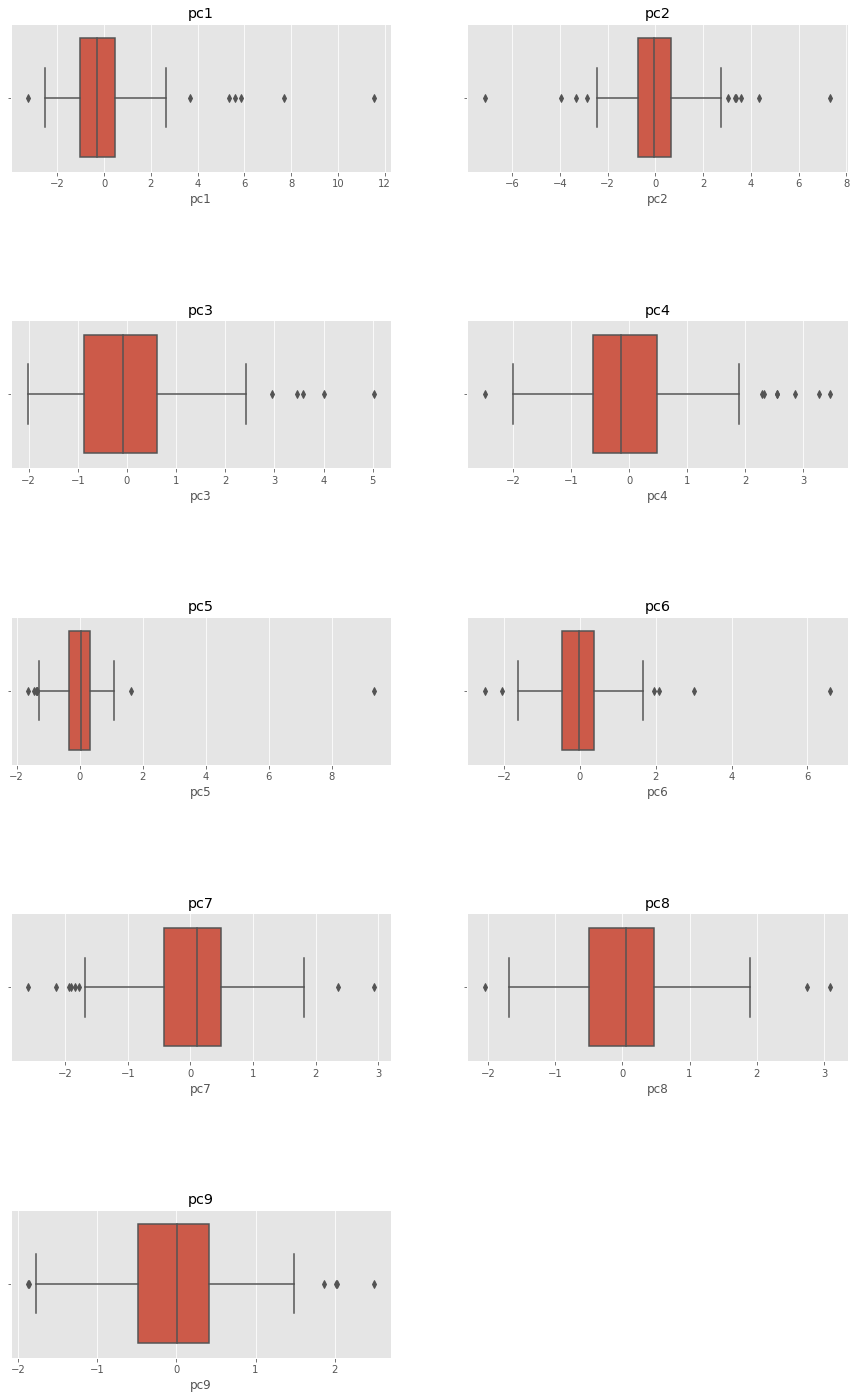

In [ ]:
features=list(pca_comp.select_dtypes(exclude=['object']))
fig=plt.subplots(figsize=(15,30))
for i, j in enumerate(features):
    plt.subplot(6, 2, i+1),
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(pca_comp[j])
    plt.title(j)

In [ ]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 15 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(pca_comp)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,1732.366973
1,2,1339.545723
2,3,1155.230416
3,4,998.052037
4,5,876.768536
5,6,784.136355
6,7,718.588752
7,8,655.403255
8,9,611.424321
9,10,567.267349


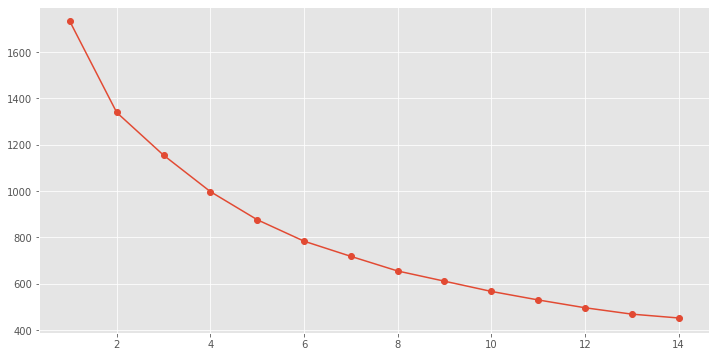

In [ ]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

kmeans = KMeans(n_clusters=4, n_init = 15, random_state=2)
kmeans.fit(X_pca)

centroids=kmeans.cluster_centers_


# creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [ ]:
kmeans = KMeans(n_clusters=8,random_state=42)
clusters = kmeans.fit_predict(pca_comp)
df_k = country.copy(deep=True)
df_k['label'] = clusters

In [ ]:
df_k

,valor,Balanza comercial,Cantidad exportadas,Precio por tonelada,Crecimiento valor 5 años,Crecimiento cantidades 5 añis,Crecimiento último año valor,Ranking importaciones mundiales,Porcentaje importaciones mundiales,crecimiento importaciones mundial,Distancia de España,Concentración de los 50 exportadores,Tarifa promedio,label
Importaciones,,,,,,,,,,,,,,
Afghanistan,59,359,241,1490,-1,-1,-23,168,0.00,-3,5348,0.24,10.0,7
Albania,64,64,37,1730,15,8,176,62,0.20,21,468,0.79,10.0,1
Algeria,652,638,175,3726,-26,-40,209,109,0.05,-15,5018,0.21,25.3,7
Angola,776,776,477,1627,-1,-3,-32,88,0.08,-14,7374,0.28,50.0,7
Argentina,177,-1170,82,2159,8,16,-21,54,0.20,5,9658,0.19,14.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,1532,1532,774,1979,25,20,32,52,0.30,0,3880,0.23,14.0,0
Uzbekistan,783,783,556,1408,27,23,140,79,0.10,40,2678,0.78,35.3,1
"Venezuela, Bolivarian Republic of",1767,1767,1168,1513,2,4,40,120,0.04,7,6196,0.26,14.6,0


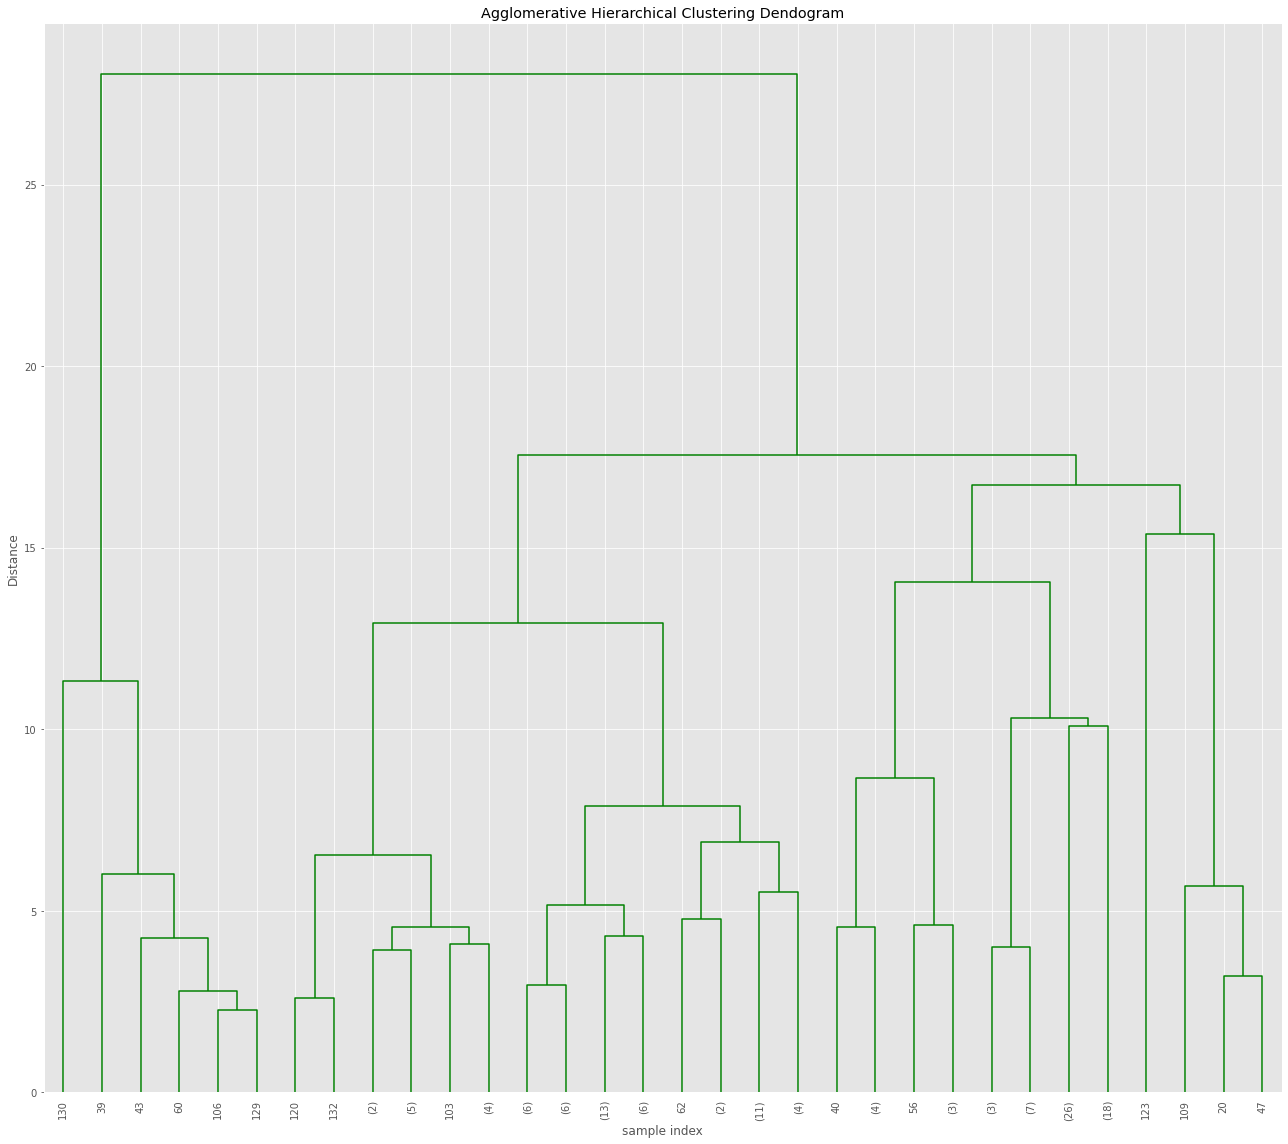

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering(n_clusters=8, affinity='euclidean',  linkage='ward')
model2.fit(X_pca)

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(country_scaled, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=70,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [ ]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "Inertia": cluster_errors } )
clusters_df[0:15]

,num_clusters,Inertia
0,1,1732.366973
1,2,1339.545723
2,3,1155.230416
3,4,998.052037
4,5,876.768536
5,6,784.136355
6,7,718.588752
7,8,655.403255
8,9,611.424321
9,10,567.267349


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.5495887863826383


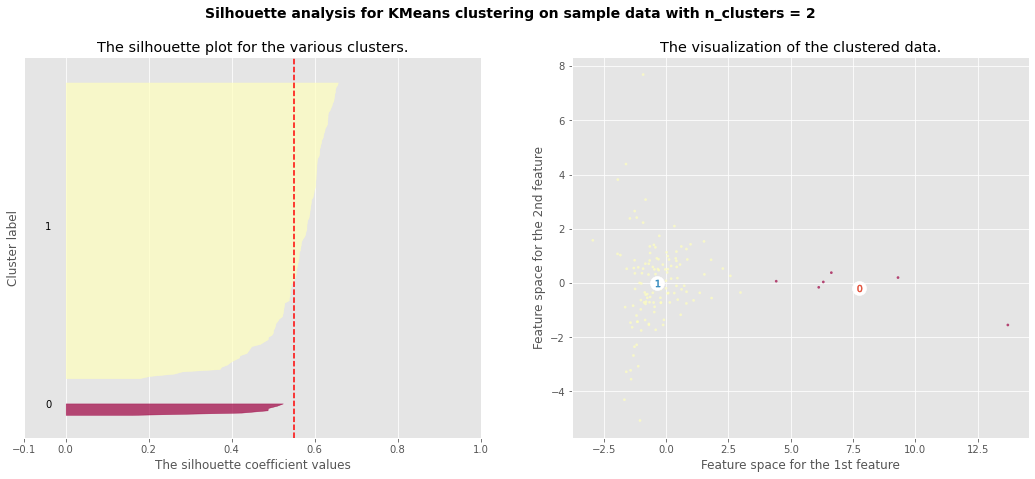

For n_clusters = 3 The average silhouette_score is : 0.18302279223527135


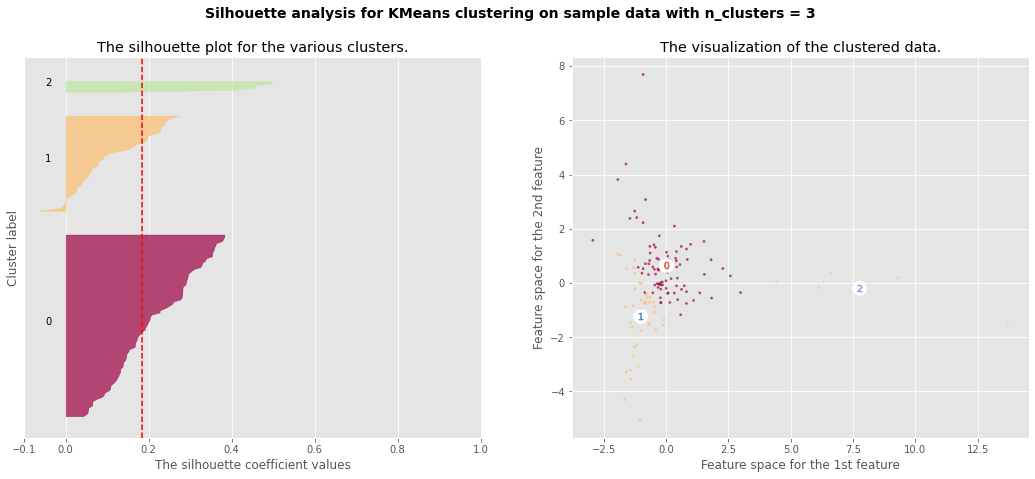

For n_clusters = 4 The average silhouette_score is : 0.19282034733093534


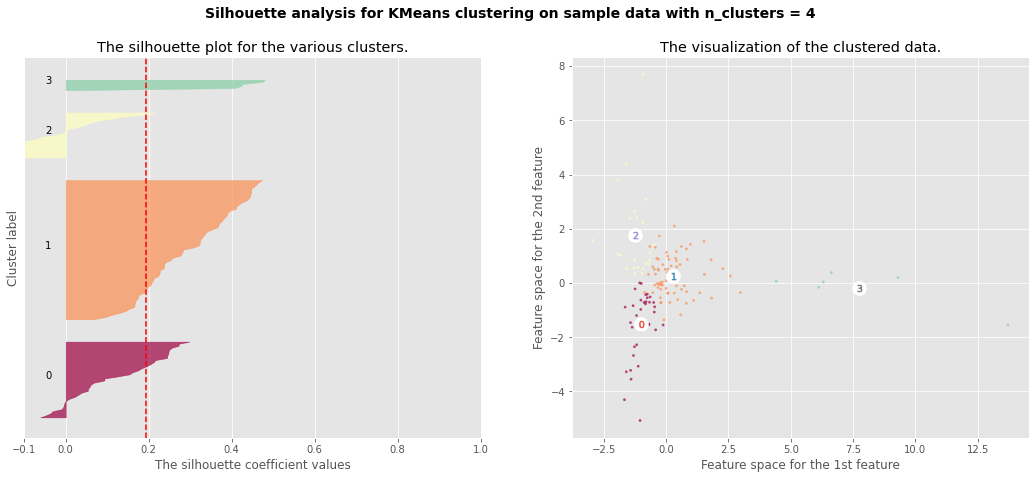

For n_clusters = 5 The average silhouette_score is : 0.20436335672199957


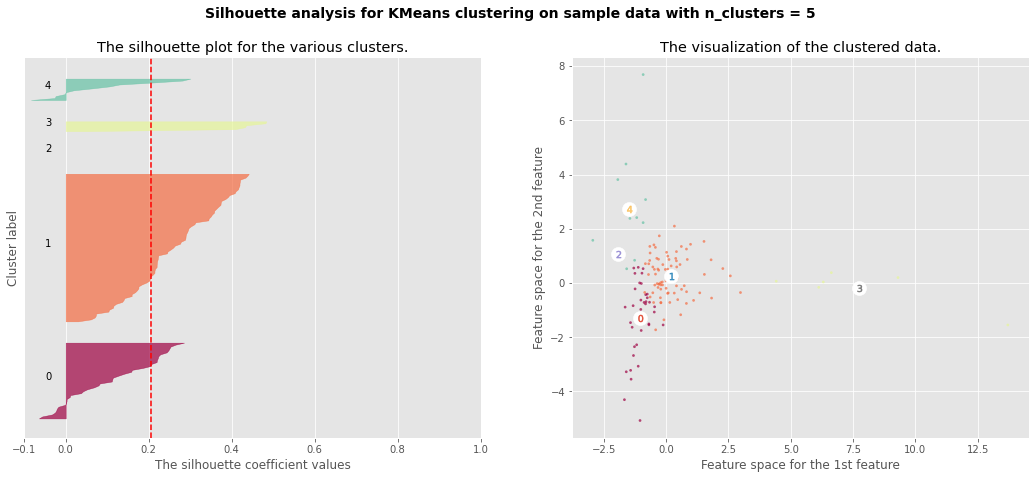

For n_clusters = 6 The average silhouette_score is : 0.17181675968869442


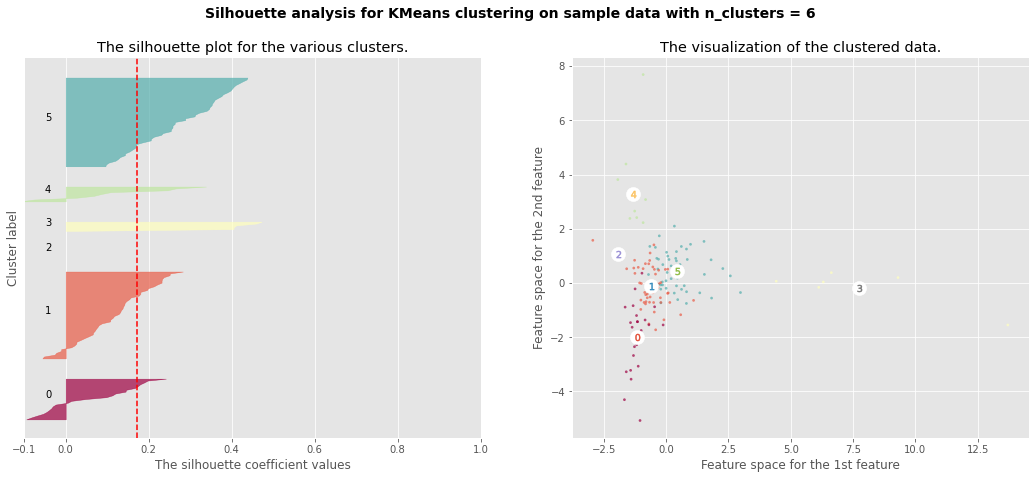

For n_clusters = 7 The average silhouette_score is : 0.18509904071710045


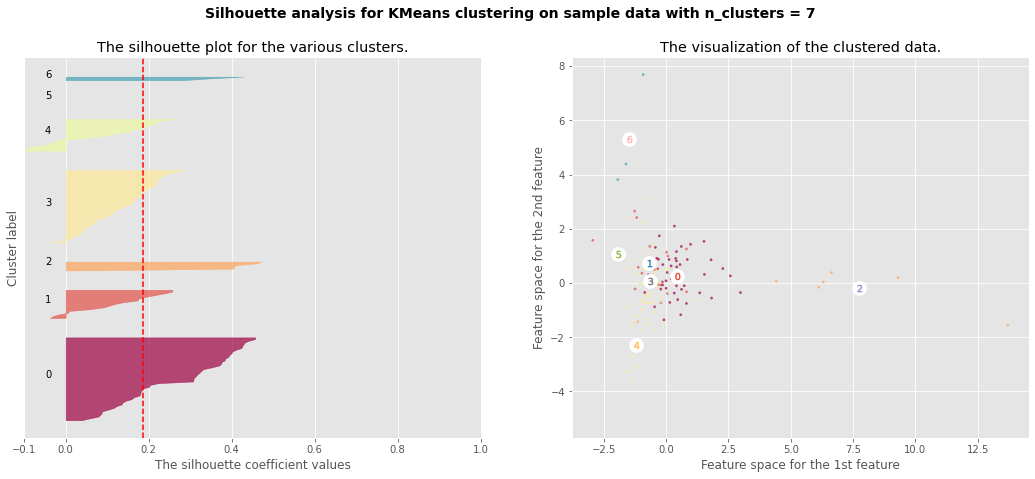

For n_clusters = 8 The average silhouette_score is : 0.17111103233988664


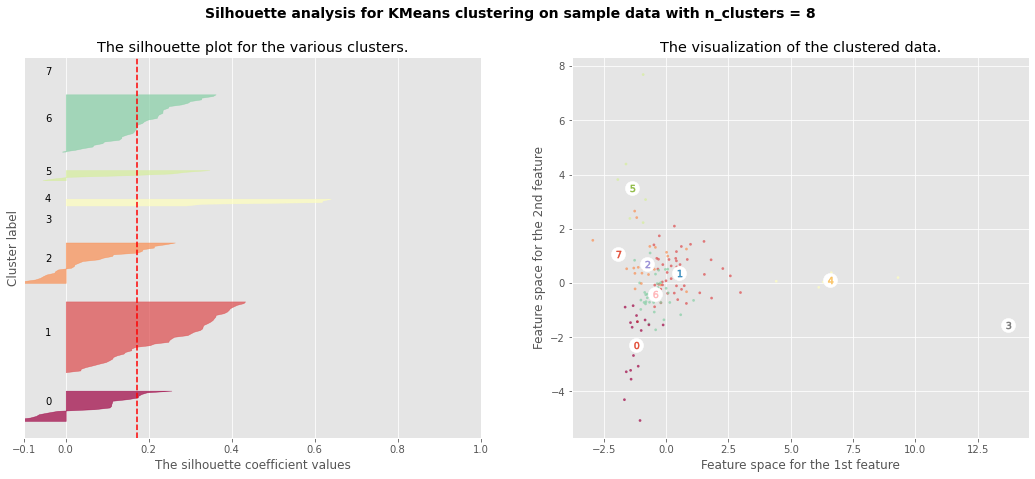

In [ ]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

X=X_pca

range_n_clusters = [2, 3, 4, 5,6,7,8]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters,n_init=15, random_state=2)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [ ]:
 df_k[df_k.loc[:,'label']==0].mean()

valor                                   2309.000000
Balanza comercial                        247.000000
Cantidad exportadas                     1337.625000
Precio por tonelada                     1839.843750
Crecimiento valor 5 años                   5.031250
Crecimiento cantidades 5 añis              4.468750
Crecimiento último año valor              10.187500
Ranking importaciones mundiales           73.281250
Porcentaje importaciones mundiales         0.290937
crecimiento importaciones mundial          5.156250
Distancia de España                     6336.562500
Concentración de los 50 exportadores       0.200937
Tarifa promedio                            6.618750
label                                      0.000000
dtype: float64

In [ ]:
df_k[df_k.loc[:,'label']==1].mean()

valor                                   112962.166667
Balanza comercial                        93412.000000
Cantidad exportadas                      73947.666667
Precio por tonelada                       1537.833333
Crecimiento valor 5 años                     2.500000
Crecimiento cantidades 5 añis                2.666667
Crecimiento último año valor                 2.333333
Ranking importaciones mundiales              5.500000
Porcentaje importaciones mundiales           6.750000
crecimiento importaciones mundial            5.333333
Distancia de España                       2819.666667
Concentración de los 50 exportadores         0.133333
Tarifa promedio                              2.600000
label                                        1.000000
dtype: float64

In [ ]:
df_k[df_k.loc[:,'label']==2].mean()

valor                                    554.145833
Balanza comercial                        166.958333
Cantidad exportadas                      296.312500
Precio por tonelada                     1934.937500
Crecimiento valor 5 años                   2.583333
Crecimiento cantidades 5 añis              1.104167
Crecimiento último año valor              95.583333
Ranking importaciones mundiales          120.312500
Porcentaje importaciones mundiales         0.076250
crecimiento importaciones mundial         -1.375000
Distancia de España                     5530.041667
Concentración de los 50 exportadores       0.293750
Tarifa promedio                           19.477083
label                                      2.000000
dtype: float64

In [ ]:
df_k[df_k.loc[:,'label']==0].index

Index(['Argentina', 'Australia', 'Bahrain', 'Bangladesh', 'Brunei Darussalam',
       'Chile', 'China', 'Colombia', 'Dominican Republic', 'Egypt', 'Honduras',
       'Hong Kong, China', 'Jordan', 'Kuwait', 'Malaysia', 'Mauritania',
       'Mauritius', 'New Zealand', 'Oman', 'Pakistan', 'Panama', 'Paraguay',
       'Philippines', 'Qatar', 'Seychelles', 'Singapore', 'South Africa',
       'Taipei, Chinese', 'Trinidad and Tobago', 'United Arab Emirates',
       'Uruguay', 'Venezuela, Bolivarian Republic of'],
      dtype='object', name='Importaciones')

In [ ]:

df_k[df_k.loc[:,'label']==1].index

Index(['Albania', 'Cabo Verde', 'Côte d'Ivoire', 'Cuba', 'Ecuador', 'Ethiopia',
       'Ghana', 'Guinea-Bissau', 'Haiti', 'India', 'Indonesia', 'Jamaica',
       'Kyrgyzstan', 'Madagascar', 'Maldives', 'Mali', 'Morocco', 'Mozambique',
       'Palestine, State of', 'Peru', 'Senegal', 'Tajikistan', 'Uzbekistan',
       'Viet Nam', 'Yemen'],
      dtype='object', name='Importaciones')

In [ ]:

df_k[df_k.loc[:,'label']==2].index

Index(['France', 'United States of America'], dtype='object', name='Importaciones')

In [ ]:

df_k[df_k.loc[:,'label']==3].index

Index(['Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'El Salvador', 'Estonia', 'Finland',
       'Georgia', 'Greece', 'Guatemala', 'Hungary', 'Iceland', 'Iraq',
       'Ireland', 'Israel', 'Japan', 'Kazakhstan', 'Korea, Republic of',
       'Latvia', 'Libya, State of', 'Lithuania', 'Luxembourg',
       'Macedonia, North', 'Malta', 'Mexico', 'Moldova, Republic of',
       'Montenegro', 'Netherlands', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine'],
      dtype='object', name='Importaciones')

In [ ]:

df_k[df_k.loc[:,'label']==4].index

Index(['Cambodia', 'Guinea', 'Mongolia', 'Serbia'], dtype='object', name='Importaciones')

In [ ]:

df_k[df_k.loc[:,'label']==5].index

Index(['Canada', 'Germany', 'Italy', 'Russian Federation', 'Saudi Arabia',
       'United Kingdom'],
      dtype='object', name='Importaciones')

In [ ]:
print(list(df_k[df_k.loc[:,'label']==6].index))

['Togo']


In [ ]:
print(list(df_k[df_k.loc[:,'label']==7].index))

['Afghanistan', 'Algeria', 'Angola', 'Benin', 'Bolivia, Plurinational State of', 'Cameroon', 'Gabon', 'Gambia', 'Iran, Islamic Republic of', 'Kenya', 'Lebanon', 'Liberia', 'Nepal', 'Nicaragua', 'Nigeria', 'Norway', 'Sierra Leone', 'Sri Lanka', 'Tanzania, United Republic of', 'Thailand', 'Tunisia']


In [ ]:
print(df_k[df_k.loc[:,'label']==1].mean())
print(df_k[df_k.loc[:,'label']==0].mean())

valor                                    976.9600
Balanza comercial                      -3778.4000
Cantidad exportadas                      677.4400
Precio por tonelada                     1536.9600
Crecimiento valor 5 años                  21.3200
Crecimiento cantidades 5 añis             21.9200
Crecimiento último año valor              37.0800
Ranking importaciones mundiales          110.6800
Porcentaje importaciones mundiales         0.0916
crecimiento importaciones mundial          9.4400
Distancia de España                     4723.5200
Concentración de los 50 exportadores       0.4804
Tarifa promedio                           16.3880
label                                      1.0000
dtype: float64
valor                                   2309.000000
Balanza comercial                        247.000000
Cantidad exportadas                     1337.625000
Precio por tonelada                     1839.843750
Crecimiento valor 5 años                   5.031250
Crecimiento cantidades 5 

In [ ]:
import sys
!{sys.executable} -m pip install geopandas==0.6.3
!{sys.executable} -m pip install mplleaflet
!{sys.executable} -m pip install bs4
!{sys.executable} -m pip install geocoder
!{sys.executable} -m pip install geopy
!{sys.executable} -m pip install folium
!{sys.executable} -m pip install lxml
!{sys.executable} -m pip install pygeoj
!{sys.executable} -m pip install pyshp
!{sys.executable} -m pip install datetime
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install --upgrade cython

     |████████████████████████████████| 921kB 7.7MB/s 
     |████████████████████████████████| 10.9MB 31.4MB/s 
     |████████████████████████████████| 14.7MB 334kB/s 
  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-cp36-none-any.whl size=28556 sha256=a346a86f2f87e533e9c8c74a903571b478f218ab2c869c5ce1b10ea524c95143
  Stored in directory: /root/.cache/pip/wheels/bf/fd/0b/0513de62c339c4a56e2234aa42a5d06e6660a4446fdae7b796
Successfully built mplleaflet
     |████████████████████████████████| 102kB 5.6MB/s 
  Created wheel for pygeoj: filename=PyGeoj-1.0.0-cp36-none-any.whl size=10348 sha256=3743ac5a8fcb5490bf70a83a7e3448a9766e3b344a858adbad9edcb77fec3291
  Stored in directory: /root/.cache/pip/wheels/7d/7c/8e/3c82fc15ee9f04d8df3e59817d2ee5499a8413341d6476c7d8
Successfully built pygeoj
     |████████████████████████████████| 225kB 5.9MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32609 sha256=a58f3a8e7d4154f7857b26b00eca2f5ca5f1c2a9caa7345df6e62a4d3d

In [ ]:
# required packages for neighbourhood analysis
!{sys.executable} -m pip install descartes
!{sys.executable} -m pip install requests

In [ ]:
!{sys.executable} -m pip install pandana

In [ ]:
# required packages for modelling
!{sys.executable} -m pip install xgboost

In [ ]:
%matplotlib inline

# general
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Geographical analysis
import geopandas as gpf #libspatialindex nees to be installed first
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import shapefile as shp
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import requests
import descartes

# accessibility analysis
import time
from pandana.loaders import osm
from pandana.loaders import pandash5

# modelling
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing 
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

#Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot preference
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

print('Libraries imported.')

Libraries imported.


In [ ]:
country.head()

,valor,Balanza comercial,Cantidad exportadas,Precio por tonelada,Crecimiento valor 5 años,Crecimiento cantidades 5 añis,Crecimiento último año valor,Ranking importaciones mundiales,Porcentaje importaciones mundiales,crecimiento importaciones mundial,Distancia de España,Concentración de los 50 exportadores,Tarifa promedio
Importaciones,,,,,,,,,,,,,
Afghanistan,59,359,241,1490,-1,-1,-23,168,0.00,-3,5348,0.24,10.0
Albania,64,64,37,1730,15,8,176,62,0.20,21,468,0.79,10.0
Algeria,652,638,175,3726,-26,-40,209,109,0.05,-15,5018,0.21,25.3
Angola,776,776,477,1627,-1,-3,-32,88,0.08,-14,7374,0.28,50.0
Argentina,177,-1170,82,2159,8,16,-21,54,0.20,5,9658,0.19,14.0


In [ ]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = country.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

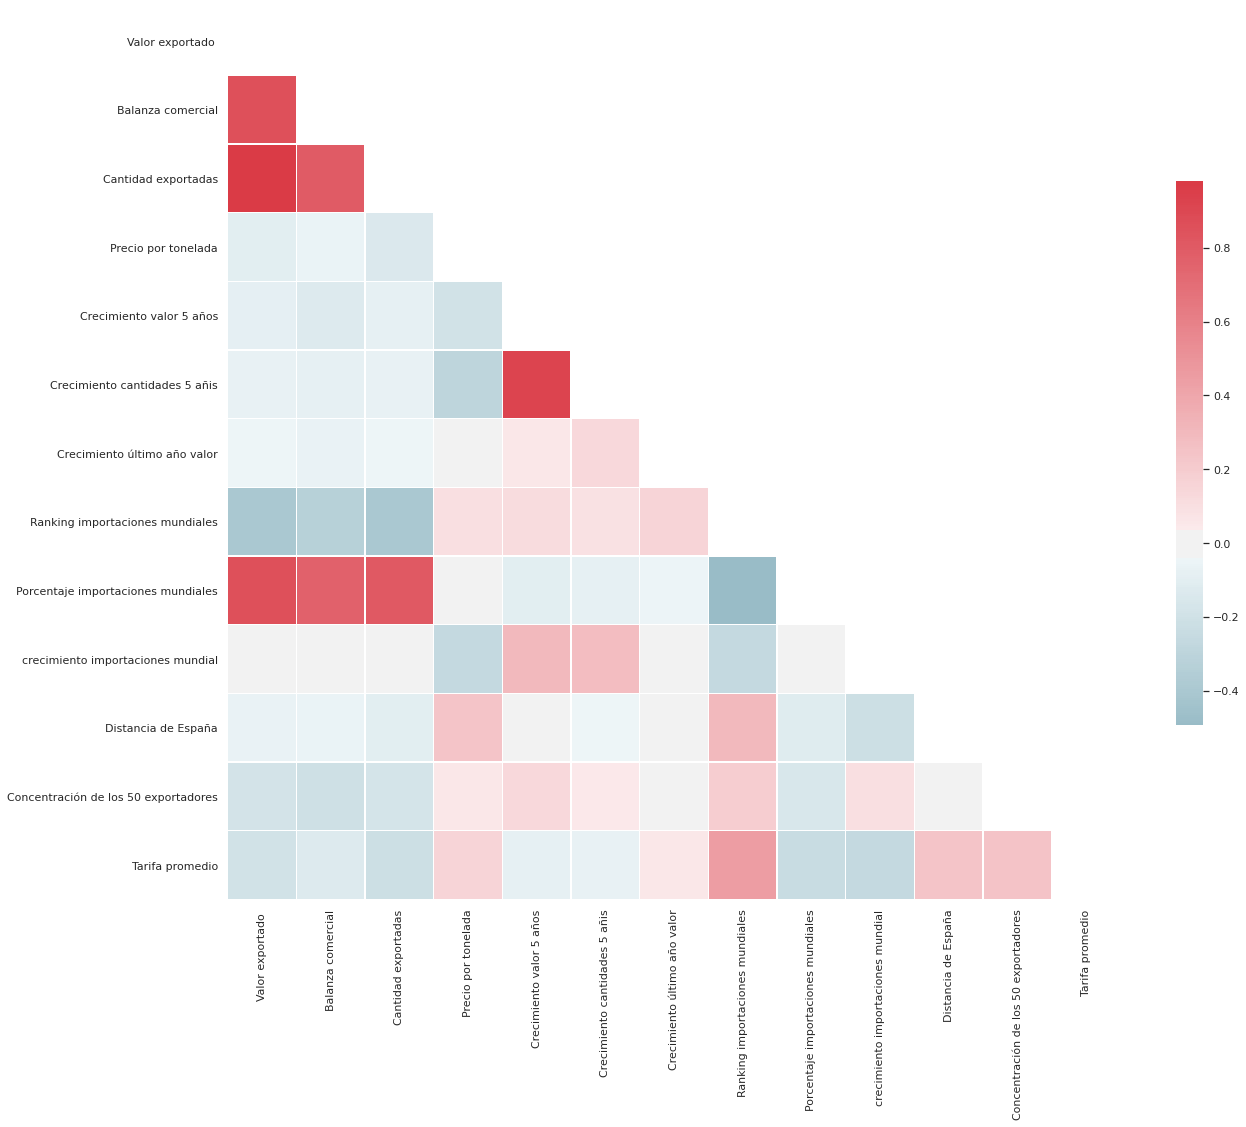

In [ ]:
multi_collinearity_heatmap(country, figsize=(20,20))

In [ ]:
X = country.drop('valor', axis=1)
y = country.valor

In [ ]:
import numpy as np 
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
  
def generate_dataset(n): 
    x = [] 
    y = [] 
    random_x1 = np.random.rand() 
    random_x2 = np.random.rand() 
    for i in range(n): 
        x1 = i 
        x2 = i/2 + np.random.rand()*n 
        x.append([1, x1, x2]) 
        y.append(random_x1 * x1 + random_x2 * x2 + 1) 
    return np.array(x), np.array(y) 

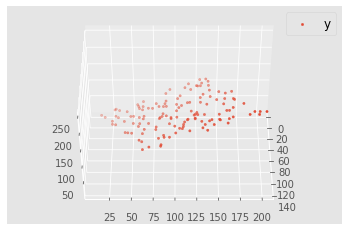

In [ ]:
x, y = generate_dataset(136) 
  
mpl.rcParams['legend.fontsize'] = 12
  
fig = plt.figure() 
ax = fig.gca(projection ='3d') 
  
ax.scatter(x[:, 1], x[:, 2], y, label ='y', s = 5) 
ax.legend() 
ax.view_init(45, 0) 
  
plt.show() 

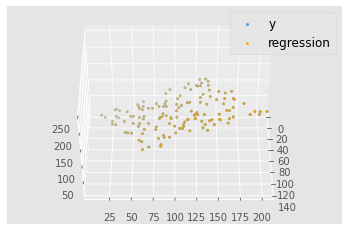

In [ ]:
def mse(coef, x, y): 
    return np.mean((np.dot(x, coef) - y)**2)/2
  
def gradients(coef, x, y): 
    return np.mean(x.transpose()*(np.dot(x, coef) - y), axis = 1) 
  
def multilinear_regression(coef, x, y, lr, b1 = 0.9, b2 = 0.999, epsilon = 1e-8): 
    prev_error = 0
    m_coef = np.zeros(coef.shape) 
    v_coef = np.zeros(coef.shape) 
    moment_m_coef = np.zeros(coef.shape) 
    moment_v_coef = np.zeros(coef.shape) 
    t = 0
  
    while True: 
        error = mse(coef, x, y) 
        if abs(error - prev_error) <= epsilon: 
            break
        prev_error = error 
        grad = gradients(coef, x, y) 
        t += 1
        m_coef = b1 * m_coef + (1-b1)*grad 
        v_coef = b2 * v_coef + (1-b2)*grad**2
        moment_m_coef = m_coef / (1-b1**t) 
        moment_v_coef = v_coef / (1-b2**t) 
  
        delta = ((lr / moment_v_coef**0.5 + 1e-8) * 
                 (b1 * moment_m_coef + (1-b1)*grad/(1-b1**t))) 
  
        coef = np.subtract(coef, delta) 
    return coef 
  
coef = np.array([0, 0, 0]) 
c = multilinear_regression(coef, x, y, 1e-1) 
fig = plt.figure() 
ax = fig.gca(projection ='3d') 
  
ax.scatter(x[:, 1], x[:, 2], y, label ='y', 
                s = 5, color ="dodgerblue") 
  
ax.scatter(x[:, 1], x[:, 2], c[0] + c[1]*x[:, 1] + c[2]*x[:, 2], 
                    label ='regression', s = 5, color ="orange") 
  
ax.view_init(45, 0) 
ax.legend() 
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import math
import time


In [ ]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123) 

In [ ]:
hpm_reg_start = time.time()

# Create instance of the model, `LinearRegression` function from 
# Scikit-Learn and fit the model on the training data:

hpm_reg = LinearRegression()  
hpm_reg.fit(X_train, y_train) #training the algorithm

# Now that the model has been fit we can make predictions by calling 
# the predict command. We are making predictions on the testing set:
training_preds_hpm_reg = hpm_reg.predict(X_train)
val_preds_hpm_reg = hpm_reg.predict(X_test)

hpm_reg_end = time.time()

print(f"Time taken to run: {round((hpm_reg_end - hpm_reg_start)/60,1)} minutes")

# Check the predictions against the actual values by using the MSE and R-2 metrics:
print("\nTraining RMSE:", round(mean_squared_error(y_train, training_preds_hpm_reg),4))
print("Validation RMSE:", round(mean_squared_error(y_test, val_preds_hpm_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_hpm_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_hpm_reg),4))

Time taken to run: 0.0 minutes

Training RMSE: 2195.6918
Validation RMSE: 2986.8583

Training r2: 0.1212
Validation r2: -0.147


In [ ]:
y_test_array = np.array(list(y_test))
val_preds_hpm_reg_array = np.array(val_preds_hpm_reg)
hpm_df = pd.DataFrame({'Actual': y_test_array.flatten(), 'Predicted': val_preds_hpm_reg_array.flatten()})
hpm_df

,Actual,Predicted
0,188.058175,134.696063
1,157.649516,130.476745
2,192.811480,132.420846
3,237.744594,124.237142
4,27.454501,146.653252
5,164.667674,121.086591
6,144.323759,117.104555
7,148.849241,111.049873
8,227.600067,123.509348
9,86.270299,108.735248


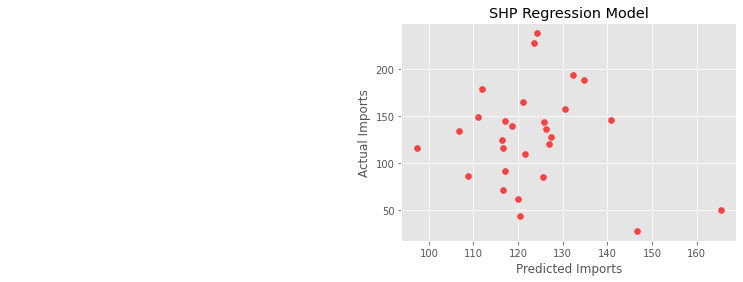

In [ ]:
actual_values = y_test
plt.scatter(val_preds_hpm_reg, actual_values, alpha=.7,
            color='r') #alpha helps to show overlapping data
overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    (round(r2_score(y_test, val_preds_hpm_reg),4)),
                    (round(mean_squared_error(y_test, val_preds_hpm_reg))),4)
plt.annotate( s=overlay,xy=(5.5,2.5),size='x-large')
plt.xlabel('Predicted Imports')
plt.ylabel('Actual Imports')
plt.title('SHP Regression Model')
plt.show()

In [ ]:
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

[11:16:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time taken to run: 0.0 minutes

Training MSE: 176.4087
Validation MSE: 2813.8169

Training r2: 0.9294
Validation r2: -0.0805


In [ ]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', ascending=False, inplace=True)
ft_weights_xgb_reg.head(13)

,weight
crecimiento importaciones mundial,0.128616
Ranking importaciones mundiales,0.121737
Crecimiento cantidades 5 añis,0.120704
Tarifa promedio,0.118921
Precio por tonelada,0.110810
Distancia de España,0.094985
Crecimiento valor 5 años,0.078855
Crecimiento último año valor,0.064451
Cantidad exportadas,0.061690
Concentración de los 50 exportadores,0.061066


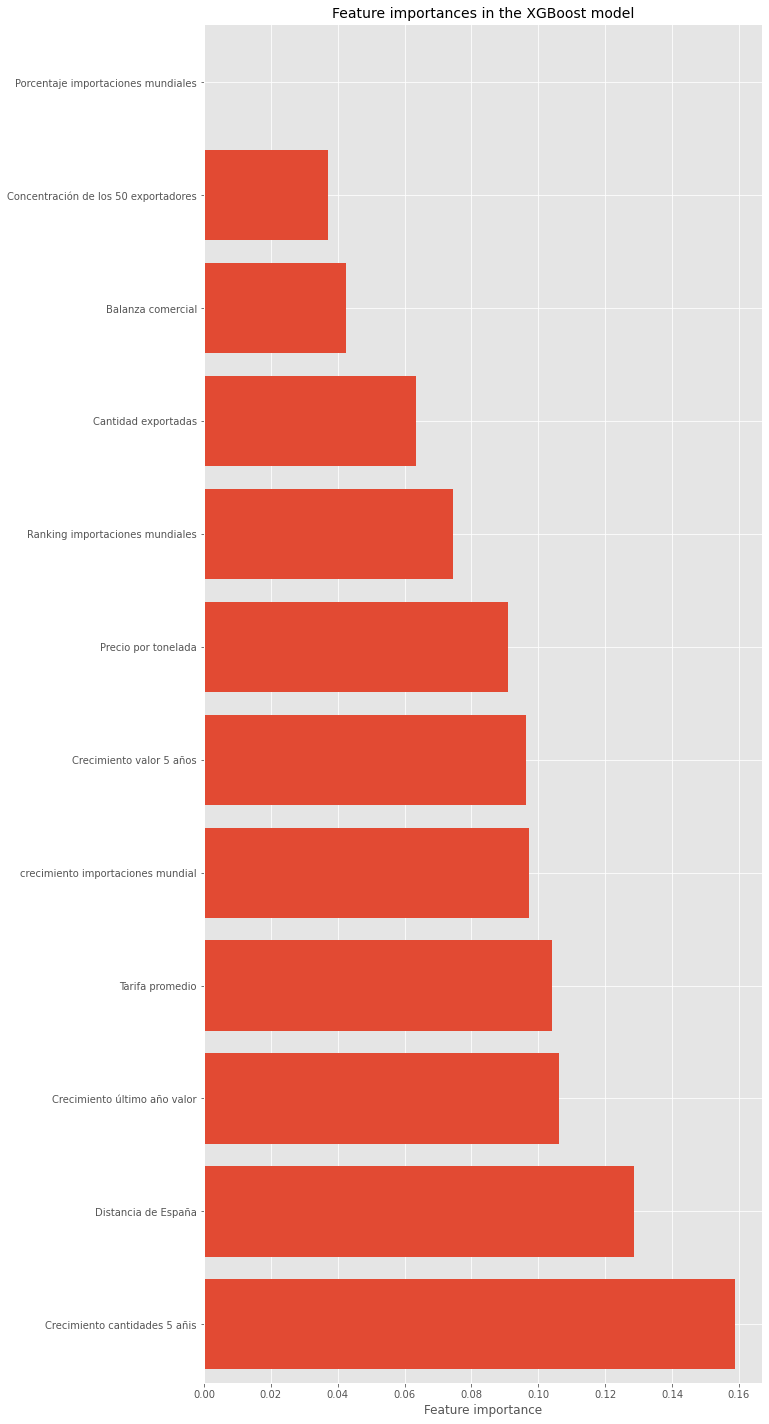

In [ ]:
# Plotting feature importances
plt.figure(figsize=(10,25))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

Para regresión no sirve, el valor medio es mejor que la regresión (R2 negativo) pero tampoco obedecemos el número de observaciones necesarias para el número de variables independientes (tenemos 12 variables y el número sería 50+8n por lo que debería ser 146 observaciones y tenemos 136 al hacer la limpieza).
para ver si un predictor específico tiene influencia cuadramos porque  104 + n o sea 116 observaciones. 

In [ ]:
pip install pyDEA

     |████████████████████████████████| 122kB 2.7MB/s 
     |████████████████████████████████| 3.5MB 6.9MB/s 
     |████████████████████████████████| 40.6MB 103kB/s 
  Created wheel for xlwt-future: filename=xlwt_future-0.8.0-cp36-none-any.whl size=3258154 sha256=e0fcf62a3f54282eabd9f135c947160a0f95527a9c9728ba338a46093da43128
  Stored in directory: /root/.cache/pip/wheels/1c/d3/cd/55582d2ec98747dc6d78b3f4314e21918a941b85870a5c3631
Successfully built xlwt-future


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyDEA as dea
import pandas as pd

%matplotlib inline

In [ ]:

input_cols = [u'E01 Balanza comercial', u'E02 Precio por tonelada', u'E03 Crecimiento valor 5 años', u'E04 Crecimiento cantidades 5 añis', u'E05 Crecimiento ultimo año valor', u'E06 Ranking importaciones mundiales', u'E07 Porcentaje importaciones mundiales', u'E08 crecimiento importaciones mundial', u'E09 Distancia de España', u'E10 Concentración de los 50 exportadores', u'E11 Tarifa promedio']
output_cols = ['valor', 'Cantidad exportadas', ]
inputs=

NameError: ignored

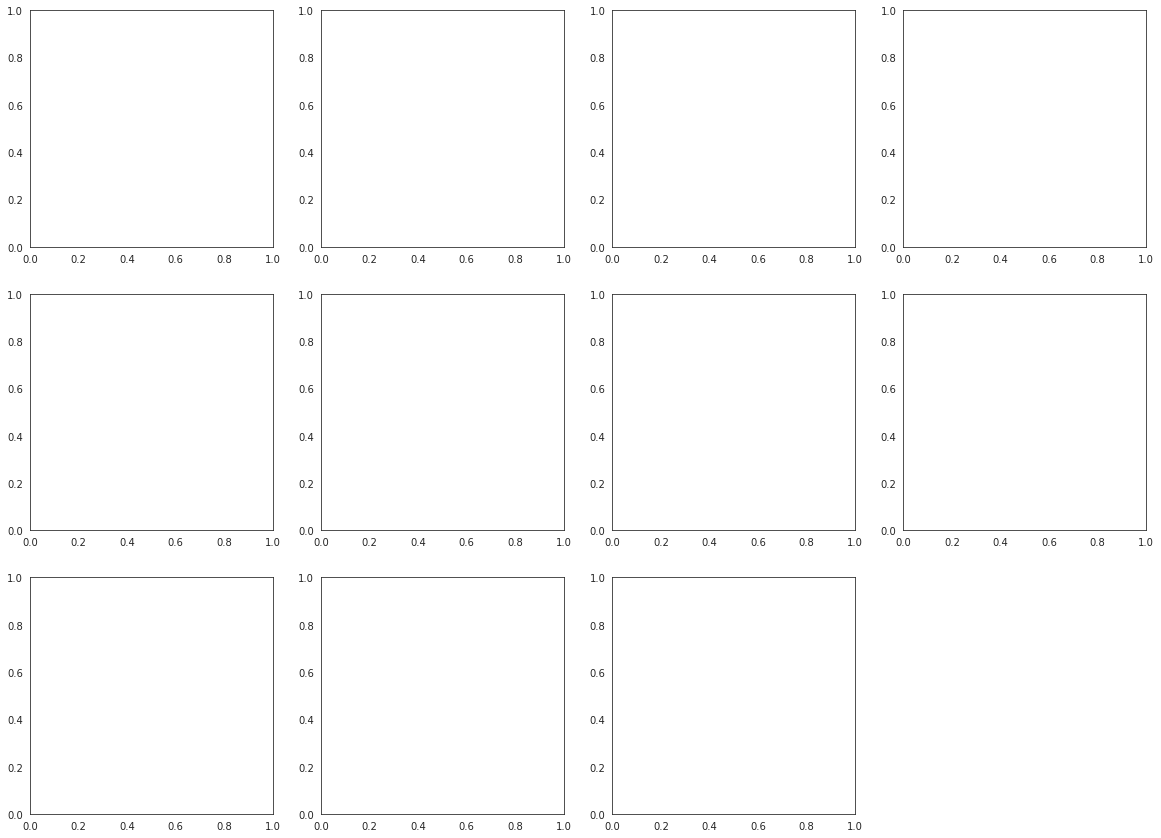

In [ ]:
import math

sns.set_style("white")

num_plots = len(input_cols)
n = int(math.ceil(math.sqrt(num_plots)))

fig = plt.figure(figsize=(20, 20))
axes = [plt.subplot(n, n, i) for i in range(1, num_plots + 1)]

i = 0
for k, v in inoutdat[input_cols].iteritems():
    ax = axes[i]
    sns.kdeplot(v, shade=True, ax=ax, legend=False)
    [label.set_visible(False) for label in ax.get_yticklabels()]
    ax.xaxis.set_ticks([v.min(), v.max()])
    ax.set_title(k)
    i += 1
sns.despine(left=True, trim=True, fig=fig)
plt.tight_layout()

In [ ]:
country.head()

,valor,Balanza comercial,Cantidad exportadas,Precio por tonelada,Crecimiento valor 5 años,Crecimiento cantidades 5 añis,Crecimiento último año valor,Ranking importaciones mundiales,Porcentaje importaciones mundiales,crecimiento importaciones mundial,Distancia de España,Concentración de los 50 exportadores,Tarifa promedio
Importaciones,,,,,,,,,,,,,
Afghanistan,59,359,241,1490,-1,-1,-23,168,0.00,-3,5348,0.24,10.0
Albania,64,64,37,1730,15,8,176,62,0.20,21,468,0.79,10.0
Algeria,652,638,175,3726,-26,-40,209,109,0.05,-15,5018,0.21,25.3
Angola,776,776,477,1627,-1,-3,-32,88,0.08,-14,7374,0.28,50.0
Argentina,177,-1170,82,2159,8,16,-21,54,0.20,5,9658,0.19,14.0


In [ ]:
input = ('Balanza comercial', 'Precio por tonelada', 'Crecimiento valor 5 años', 'Crecimiento cantidades 5 añis', 'Crecimiento ultimo año valor', 'Ranking importaciones mundiales', 'Porcentaje importaciones mundiales', 'crecimiento importaciones mundial', 'Distancia de España', 'Concentración de los 50 exportadores', 'Tarifa promedio')
output = ('valor', 'Cantidad exportadas')

In [ ]:
country = dea.DEAProblem(input, output, returns='CRS')

AttributeError: ignored